In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
import seaborn as sns

In [ ]:
Path = 'https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/insurance_data.csv'

In [ ]:
df = pd.read_csv(Path)

In [ ]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


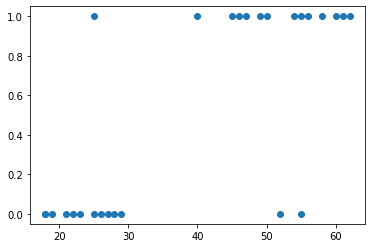

In [ ]:
plt.scatter(df['age'],df['bought_insurance'])
plt.show()

In [ ]:
###===> sigmoid function : 1/1+e^-z
## e = euler's number ~ 2.71828
# sigmoid function converts input into range (0 to 1)

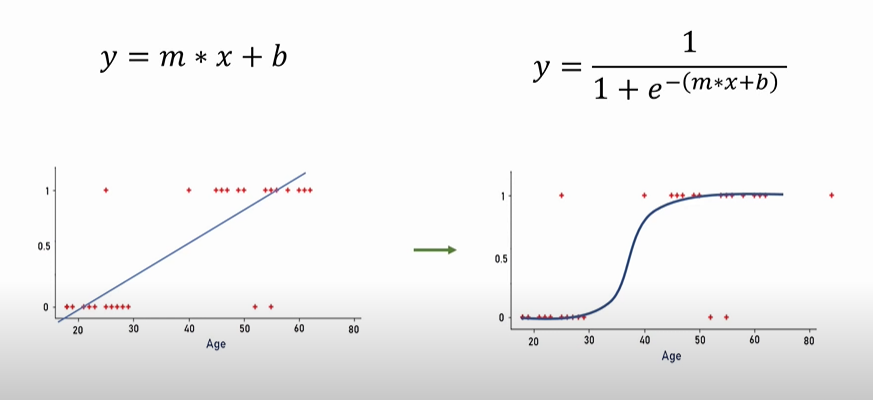

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df[['age']],df.bought_insurance,test_size=0.2,random_state =10)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
reg = LogisticRegression()

In [ ]:
reg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
x_test

,age
7,60
5,56
18,19
21,26
11,28
1,25


In [ ]:
reg.predict(x_test)

array([1, 1, 0, 0, 0, 0])

In [ ]:
reg.score(x_test,y_test)

1.0

In [ ]:
reg.predict([[34]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0])

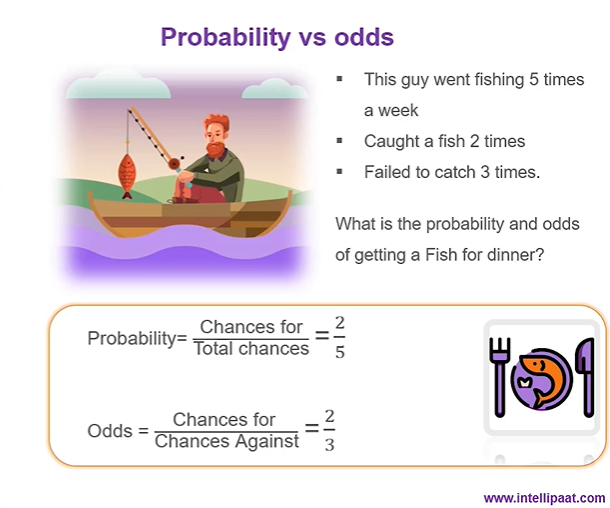

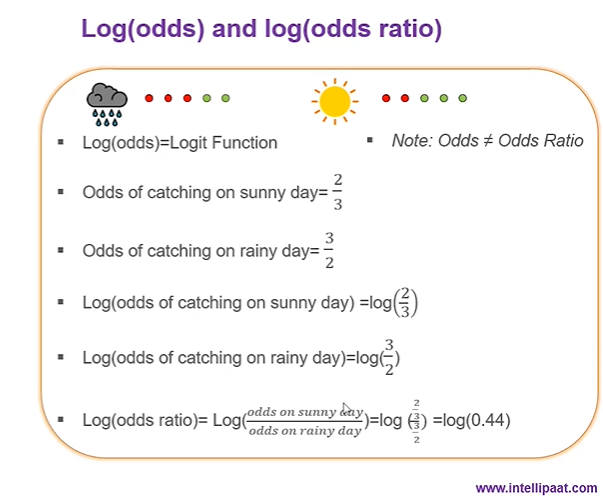

In [ ]:
###################### Example 2

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/my_submission.csv"

In [ ]:
titanic = pd.read_csv(path)
titanic.sample(3)

,PassengerId,Survived
11,903,0
200,1092,1
376,1268,1


In [ ]:
titanic['Survived'].value_counts()

0    270
1    148
Name: Survived, dtype: int64

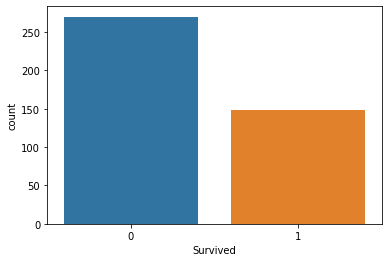

In [ ]:
sns.countplot(x = 'Survived', data = titanic)
plt.show()

In [ ]:
x = titanic.iloc[:,:-1]
y = titanic.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.4,random_state = 10)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
mod = LogisticRegression()

In [ ]:
mod.fit(X_train,Y_train)

LogisticRegression()

In [1]:
y_pred = mod.predict(X_test)

NameError: ignored

In [ ]:
print(Y_test.value_counts())
print(Y_train.value_counts())
print(titanic.shape)
print(109+59+161+89)

0    109
1     59
Name: Survived, dtype: int64
0    161
1     89
Name: Survived, dtype: int64
(418, 2)
418


In [ ]:
mod.score(X_test,Y_test)

0.6488095238095238

In [ ]:
######## confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_pred,Y_test)

array([[109,  59],
       [  0,   0]])

In [ ]:
(109)/(109+59)

0.6488095238095238

In [ ]:
#######################  Example 3

In [ ]:
pathh = "/content/drive/MyDrive/Colab Notebooks/heart_2020_cleaned.csv"

In [ ]:
df3 = pd.read_csv(pathh)

In [ ]:
print(df3.columns)
df3.sample(4)

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
160908,No,24.33,No,No,No,0.0,0.0,No,Male,45-49,White,No,Yes,Very good,7.0,No,No,No
64830,No,23.25,Yes,No,No,0.0,0.0,No,Male,60-64,White,No,Yes,Very good,7.0,No,No,No
274927,No,27.44,No,No,No,15.0,15.0,Yes,Female,65-69,White,No,Yes,Fair,8.0,No,Yes,No
105598,No,24.41,No,No,No,2.0,0.0,No,Male,30-34,White,No,Yes,Excellent,8.0,No,No,No


In [ ]:
df3.drop(columns = {'Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','AgeCategory','Race','Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer'},inplace = True)

In [ ]:
df3 = df3[['BMI','PhysicalHealth','MentalHealth','SleepTime','HeartDisease']]

In [ ]:
df3

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease
0,16.60,3.0,30.0,5.0,No
1,20.34,0.0,0.0,7.0,No
2,26.58,20.0,30.0,8.0,No
3,24.21,0.0,0.0,6.0,No
4,23.71,28.0,0.0,8.0,No
...,...,...,...,...,...
319790,27.41,7.0,0.0,6.0,Yes
319791,29.84,0.0,0.0,5.0,No
319792,24.24,0.0,0.0,6.0,No
319793,32.81,0.0,0.0,12.0,No


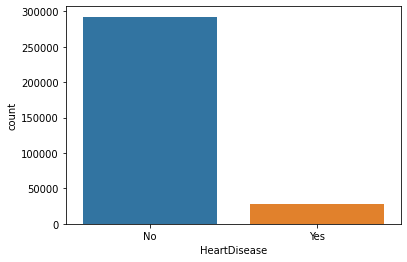

In [ ]:
sns.countplot(x = 'HeartDisease',data = df3)
plt.show()

In [ ]:
df3.HeartDisease.value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [ ]:
a = df3[['BMI','PhysicalHealth','MentalHealth','SleepTime']]
b = df3[['HeartDisease']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
a_train,a_test,b_train,b_test = train_test_split(a,b,test_size = 0.3,random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
modell = LogisticRegression()

In [ ]:
modell.fit(a_train,b_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
modell.score(a_test,b_test)

0.9151231511689719

In [ ]:
df3.sample(5)

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease
159231,24.41,0.0,3.0,7.0,No
129838,23.67,0.0,0.0,7.0,No
301429,31.57,0.0,10.0,6.0,No
8299,44.37,30.0,0.0,6.0,Yes
159840,32.50,0.0,0.0,5.0,No


In [ ]:
modell.predict([[44.37,30.0,0.0,6.0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array(['No'], dtype=object)